<a href="https://colab.research.google.com/github/BrightmanMT/Pytorch-Tutorial-Youtube/blob/main/CustomerLifetimeValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive'


'Colab Notebooks'


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Exploratory Data Analysis**

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# unique customers we have

df['CustomerID'].nunique()

4372

In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df = df.dropna(subset=['CustomerID', 'Description'])
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
#Total number of cancelled orders
df['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(8905)

In [11]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(0)

In [12]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Revenue      392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [17]:
df['CustomerID'].nunique()

4338

In [18]:
#time range of transactions

df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

**Data Visualization**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

/tmp/ipython-input-20-2864235542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


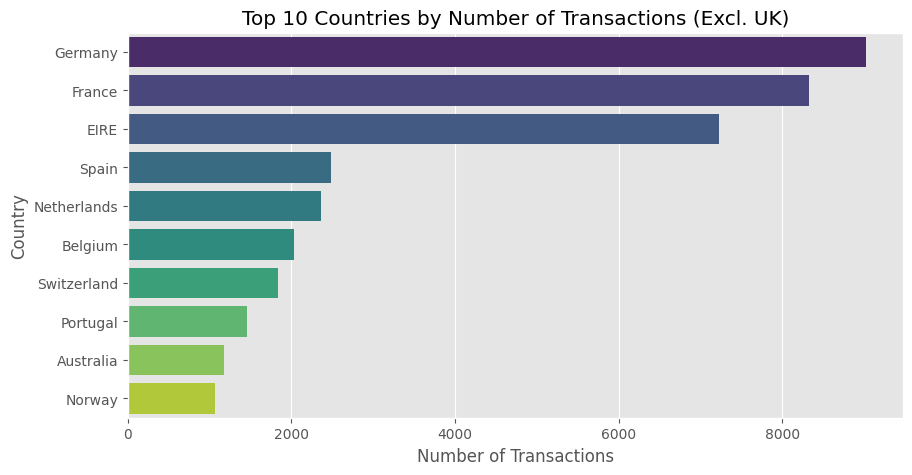

In [20]:
#Top 10 Countries by Number of Transactions

top_countries = df['Country'].value_counts().drop('United Kingdom').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Transactions (Excl. UK)")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-21-1517000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')


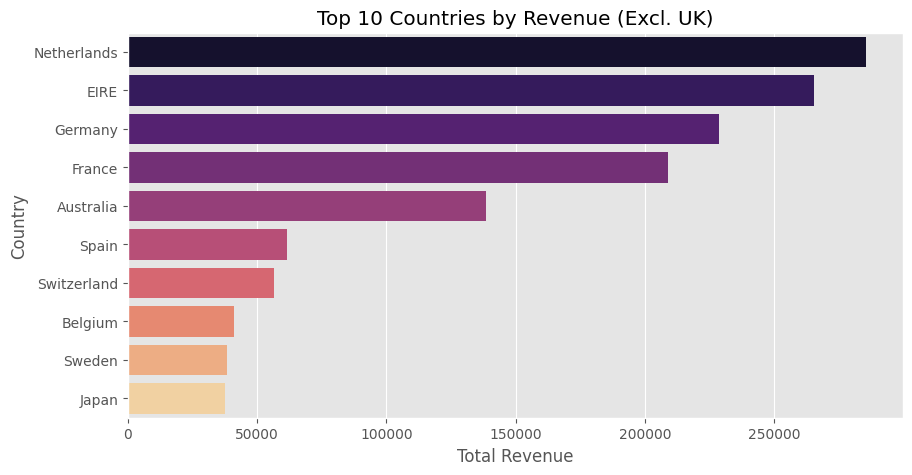

In [21]:
#Total Revenue by Country (Excluding UK)

country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')
plt.title("Top 10 Countries by Revenue (Excl. UK)")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-22-273516135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


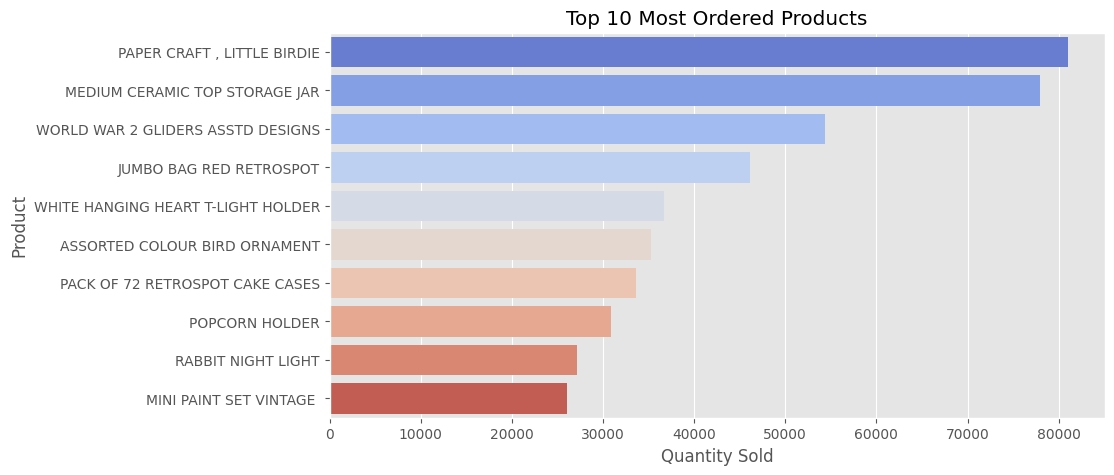

In [22]:
#Most Ordered Products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show();

In [23]:
#Monthly Revenue Trend

df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
monthly_revenue.plot(marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Column not found: TotalPrice'

In [ ]:
#Hour of Day with Highest Transactions

df['Hour'] = df['InvoiceDate'].dt.hour
hourly_txn = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_txn.index, y=hourly_txn.values, marker='o', color='darkblue')
plt.title("Transactions by Hour of the Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

In [ ]:
#Revenue Distribution per Transaction

plt.figure(figsize=(8,4))
sns.histplot(df['TotalPrice'], bins=100, kde=True, color='purple')
plt.title("Revenue per Transaction")
plt.xlabel("Total Price")
plt.xlim(0, 1000)
plt.show()

In [ ]:
#Number of Orders Per Customer

orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(8,4))
sns.histplot(orders_per_customer, bins=50, kde=True, color='green')
plt.title("Number of Orders per Customer")
plt.xlabel("Orders")
plt.ylabel("Count of Customers")
plt.show()


In [ ]:
# How many transactions per country?

import seaborn as sns
import matplotlib.pyplot as plt

country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.show()


In [ ]:
# Top-selling products

product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [ ]:
#Total revenue by country

df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country.values)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=customer_revenue.index.astype(str), y=customer_revenue.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head(10)

Building our model

In [ ]:
#Feature Engineering for CLV

import datetime as dt

# Latest date for recency calculation
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Compute metrics per customer
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).reset_index()

clv_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
clv_data.head(10)

In [ ]:
# Step 1: Calculate IQR
Q1 = clv_data['Monetary'].quantile(0.25)
Q3 = clv_data['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_no_outliers = clv_data[(clv_data['Monetary'] >= lower_bound) & (clv_data['Monetary'] <= upper_bound)]
df_no_outliers.head()

In [ ]:

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add Revenue column if not already present
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Reference date (max InvoiceDate + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouped customer data
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': [lambda x: (reference_date - x.max()).days,      # Recency
                    lambda x: (x.max() - x.min()).days,             # Tenure
                    lambda x: (x.sort_values().diff().dropna().mean()).days],  # Recency Trend
    'InvoiceNo': 'nunique',                                         # Frequency
    'Revenue': 'sum',                                               # Monetary
})

# Flatten multi-level column names
clv_data.columns = ['Recency', 'Tenure', 'Avg_Days_Between_Purchases', 'Frequency', 'Monetary']
clv_data = clv_data.reset_index()

# Average Order Value
clv_data['AvgOrderValue'] = clv_data['Monetary'] / clv_data['Frequency']

# Optionally add country if available (one-hot or most frequent)
clv_data['Country'] = country_df.values
clv_data['CountryEncoded'] = country_df_encoded

clv_data.drop(columns = 'Country').head()


In [ ]:
Q1 = clv_data['Monetary'].quantile(0.25)
Q3 = clv_data['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_no_outliers = clv_data[(clv_data['Monetary'] >= lower_bound) & (clv_data['Monetary'] <= upper_bound)]
df_no_outliers.head()

In [ ]:
#Linear regression is sensitive to scale, so we’ll normalize the data.


from sklearn.preprocessing import StandardScaler

features = ['Recency', 'Frequency', 'AvgOrderValue', 'Tenure']
scaler = StandardScaler()
clv_scaled = scaler.fit_transform(df_no_outliers[features])

# Create final DataFrame
X = pd.DataFrame(df_no_outliers, columns=features)
y = df_no_outliers['Monetary']  # We can predict Monetary or CLV

In [ ]:
y.describe()

In [ ]:
import pandas as pd

# Convert scaled array back to DataFrame for easy checking
scaled_df = pd.DataFrame(clv_scaled, columns=features)

# Print the mean and standard deviation of each column
print("Means after scaling:\n", scaled_df.mean())
print("\nStandard deviations after scaling:\n", scaled_df.std())

In [ ]:
X.head()

In [ ]:
len(y)

In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#Train a Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title(f'Actual vs Predicted CLV\nR²: {r2_score(y_test, y_pred):.3f}, RMSE: { np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
plt.grid(True)
plt.show()